<a href="https://colab.research.google.com/github/jacob-jones23/MAT-422/blob/main/4_1_Network_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**4.1 Introduction**
Network analysis is essential in analysis of data not only because social networks create huge amount of data, but also many data have network structured. One of the simple ways to introduce a network structure is to analyze correlations between variables and create correlation networks, which are widely used data mining method for studying biological networks based on pairwise correlations between variables.

##**4.1.1 Graph Model**
Any graph consists of both a set of objects, called nodes, and the connections between these nodes, called edges. Msthematically, a graph *G* is denoted as pair *G(V,E)*, where *V* = {*v$_{1}$, v$_{2}$,...,v$_{n}$*} represents the set of nodes and *E* = {*e$_{1}$, e$_{2}$,...,e$_{m}$*}

Graphs that only have directed edges are called directed graphs.

Grpahs that only have undirected edges are called undirected graphs.

Graphs that have both directed and undirected edges are called mixed graphs.


In [84]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

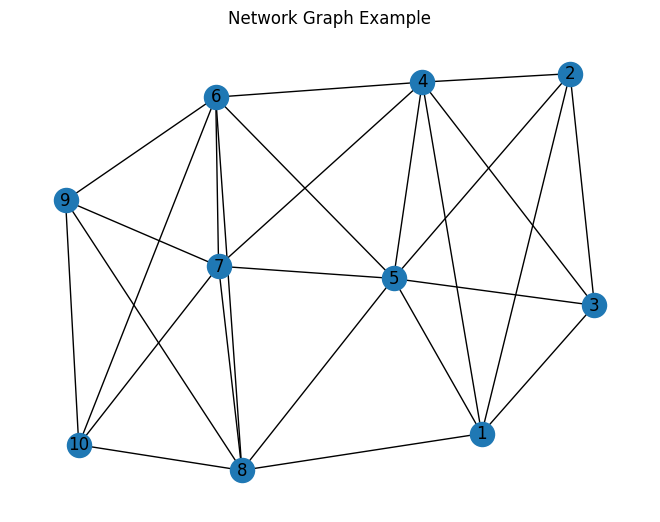

In [92]:
G = nx.Graph()

# Create 10 nodes
G.add_nodes_from([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# Randomly connect the nodes
G.add_edges_from([
    (1, 2), (1, 3), (1, 4), (1, 5), (1, 8),
    (2, 3), (2, 4), (2, 5),
    (3, 4), (3, 5),
    (4, 5), (4, 6), (4, 7),
    (5, 6), (5, 7), (5, 8),
    (6, 7), (6, 8), (6, 9), (6, 10),
    (7, 8), (7, 9), (7, 10),
    (8, 9), (8, 10),
    (9, 10),
])

# Draw the graph
nx.draw(G, with_labels=True)
plt.title("Network Graph Example")
plt.show()

##**4.1.2 Laplacian Matrix**
A graph with *n* nodes can be represented by a *n 𝗑 n* adjacency matrix. A value of 1 at row *i*, column *j* in the adjacency matrix indicates a connection between nodes *v$_{i}$* and *v$_{j}$*, and a value of 0 denotes no connection between the two nodes.

*A* is called the adjacency matrix.
In directed graphs, we can have two edges between *i* and *j*. As a result, the adjacency matrix for directed graphs is not in general symmetirc. On the other hand, the adjacency matrix for undirected graphs is symmetric (*A* = *A$^{T}$*).


An incidence matrix is a matrix that is used to represent the connectivity of a graph. It represents the edges of a graph as columns and the nodes of a graph as rows.

In [89]:
# Generate Adjacency Matrix
A = nx.adjacency_matrix(G)
print(A.todense())

[[0 1 1 1 1 0 0 1 0 0]
 [1 0 1 1 1 0 0 0 0 0]
 [1 1 0 1 1 0 0 0 0 0]
 [1 1 1 0 1 1 1 0 0 0]
 [1 1 1 1 0 1 1 1 0 0]
 [0 0 0 1 1 0 1 1 1 1]
 [0 0 0 1 1 1 0 1 1 1]
 [1 0 0 0 1 1 1 0 1 1]
 [0 0 0 0 0 1 1 1 0 1]
 [0 0 0 0 0 1 1 1 1 0]]


In [103]:
def laplacian_matrix(graph: nx.Graph):
    """Get the Laplacian Matrix of a Graph"""
    _adj = nx.adjacency_matrix(graph)
    _diag = np.diag(np.sum(_adj, axis=1))
    return _diag - _adj

In [104]:
L = laplacian_matrix(graph=G)
print(L)

[[ 5 -1 -1 -1 -1  0  0 -1  0  0]
 [-1  4 -1 -1 -1  0  0  0  0  0]
 [-1 -1  4 -1 -1  0  0  0  0  0]
 [-1 -1 -1  6 -1 -1 -1  0  0  0]
 [-1 -1 -1 -1  7 -1 -1 -1  0  0]
 [ 0  0  0 -1 -1  6 -1 -1 -1 -1]
 [ 0  0  0 -1 -1 -1  6 -1 -1 -1]
 [-1  0  0  0 -1 -1 -1  6 -1 -1]
 [ 0  0  0  0  0 -1 -1 -1  4 -1]
 [ 0  0  0  0  0 -1 -1 -1 -1  4]]
